# Latest Smartphone Dataset March 2024

### About Dataset
This dataset is scrapped from [www.smartprix.com](www.smartprix.com) using selenium and beautiful Soup Library , this dataset contains 10 columns
The columns contains
* Id
* Model Name
* Specification
* Display
* RAM
* Proccessor
* Camera Information
* Rating
* Price
* Battery

### Import libraries

In [1024]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

from sklearn import metrics 

### Load dataset

In [1025]:
df = pd.read_csv('smartphones.csv')

### Data Inspection

In [1026]:
df.head()

,Unnamed: 0,Model,Price,Rating,Specification,Processor,RAM,Battery,Display,Camera,Memory,OperatingSystem
0,0,iQOO Z9 5G,"₹19,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 7200, Octa Core, 2.8 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 44W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 2 MP Dual Rear & 16 MP Front Camera,"Memory Card (Hybrid), upto 1 TB",Android v14
1,1,Nothing Phone 2a,"₹23,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 7200 Pro, Octa Core, 2.8 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 45W Fast Charging,"6.7 inches, 1084 x 2412 px, 120 Hz Display wit...",50 MP + 50 MP Dual Rear & 32 MP Front Camera,Android v14,No FM Radio
2,2,Vivo V30 Pro 5G,"₹41,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 8200, Octa Core, 3.1 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.78 inches, 1260 x 2800 px, 120 Hz Display wi...",50 MP + 50 MP + 50 MP Triple Rear & 50 MP Fron...,Memory Card Not Supported,Android v14
3,3,Vivo V30 5G,"₹33,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 7 Gen3, Octa Core, 2.63 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.78 inches, 1260 x 2800 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 50 MP Front Camera,Memory Card Supported,Android v14
4,4,Realme 12 Plus 5G,"₹19,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 7050, Octa Core, 2.6 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 2 TB",Android v14


In [1027]:
df.tail()

,Unnamed: 0,Model,Price,Rating,Specification,Processor,RAM,Battery,Display,Camera,Memory,OperatingSystem
1015,1015,GFive Z9 New,₹664,NaN,Dual Sim,No Wifi,1.2 MHz Processor,"32 MB RAM, 32 MB inbuilt",1000 mAh Battery,"1.8 inches, 320 x 480 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 16 GB"
1016,1016,itel Ace 2 Heera,₹854,NaN,Dual Sim,"Single Core, 208 MHz Processor","32 MB RAM, 32 MB inbuilt",1000 mAh Battery,"1.8 inches, 120 x 240 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth
1017,1017,Karbonn ‎KX11I,₹899,NaN,Dual Sim,"32 MB RAM, 32 MB inbuilt",1000 mAh Battery,"1.8 inches, 128 x 160 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",Symbian v9.3,Bluetooth
1018,1018,MTR Fold Z,"₹1,600",NaN,Dual Sim,256 MHz Processor,"32 MB RAM, 32 MB inbuilt",2000 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear Camera,Memory Card Supported,No FM Radio
1019,1019,Tryto Neo,₹680,NaN,Dual Sim,256 MHz Processor,"32 MB RAM, 32 MB inbuilt",1100 mAh Battery,"1.8 inches, 120 x 240 px Display",0.3 MP Rear Camera,Memory Card Supported,No FM Radio


In [1028]:
df.sample(10)

,Unnamed: 0,Model,Price,Rating,Specification,Processor,RAM,Battery,Display,Camera,Memory,OperatingSystem
988,988,Snexian Rock R6 New,₹999,NaN,Single Sim,"32 MB RAM, 32 MB inbuilt",3000 mAh Battery,"2.4 inches, 240 x 320 px Display",1.3 MP Rear Camera,Memory Card Supported,NaN,NaN
690,690,itel S23 (4GB RAM +128 GB),"₹6,839",70.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Octa Core, 1.6 GHz Processor","4 GB RAM, 128 GB inbuilt",5000 mAh Battery with 10W Fast Charging,"6.6 inches, 1600 x 720 px, 90 Hz Display with ...",50 MP + 0.08 MP Dual Rear & 8 MP Front Camera,"Memory Card Supported, upto 512 GB",Android v13
652,652,Nokia 6310 2021,"₹3,299",NaN,"Dual Sim, Wi-Fi",Unisoc 6531F,"8 MB RAM, 16 MB inbuilt",1150 mAh Battery,"2.8 inches, 160 x 240 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth
331,331,Samsung Galaxy A25 5G (8GB RAM + 256GB),"₹29,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Exynos 1280, Octa Core, 2.4 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 25W Fast Charging,"6.5 inches, 1080 x 2340 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v14
339,339,Xiaomi Redmi Note 12 Pro Plus,"₹27,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster","Dimensity 1080, Octa Core, 2.6 GHz Processor","8 GB RAM, 256 GB inbuilt",4980 mAh Battery with 120W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",200 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v12
521,521,Realme 9 Pro 5G,"₹18,990",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.6 inches, 1080 x 2412 px, 120 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card Supported, upto 256 GB",Android v12
860,860,itel it2163S,₹921,NaN,Dual Sim,"4 MB RAM, 4 MB inbuilt",1200 mAh Battery,"1.8 inches, 160 x 128 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,NaN
208,208,Poco F4 (12GB RAM + 256GB),"₹21,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 870, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4500 mAh Battery with 67W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 20 MP Front ...,Android v12,No FM Radio
171,171,iQOO Neo 7 (12GB RAM + 256GB),"₹27,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster","Dimensity 8200, Octa Core, 3.1 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 120W Fast Charging,"6.78 inches, 1080 x 2400 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,Android v13,No FM Radio
900,900,Realme Narzo 50A,"₹9,799",71.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Helio G85, Octa Core, 2 GHz Processor","4 GB RAM, 64 GB inbuilt",6000 mAh Battery with 18W Fast Charging,"6.5 inches, 720 x 1600 px Display with Water D...",50 MP + 2 MP + 2 MP Triple Rear & 8 MP Front C...,"Memory Card Supported, upto 256 GB",Android v11


In [1029]:
df.duplicated().sum()

0

No duplicates. That's good

In [1030]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1020 non-null   int64  
 1   Model            1020 non-null   object 
 2   Price            1020 non-null   object 
 3   Rating           443 non-null    float64
 4   Specification    1020 non-null   object 
 5   Processor        1020 non-null   object 
 6   RAM              1020 non-null   object 
 7   Battery          1020 non-null   object 
 8   Display          1020 non-null   object 
 9   Camera           1020 non-null   object 
 10  Memory           1003 non-null   object 
 11  OperatingSystem  976 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 95.8+ KB


### Data Cleaning

##### Drop irrelevant columns

In [1031]:
df.drop(columns=['Unnamed: 0', 'Model', 'Rating', 'Memory'], inplace=True)

In [1032]:
df.head()

,Price,Specification,Processor,RAM,Battery,Display,Camera,OperatingSystem
0,"₹19,999","Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 7200, Octa Core, 2.8 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 44W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 2 MP Dual Rear & 16 MP Front Camera,Android v14
1,"₹23,999","Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 7200 Pro, Octa Core, 2.8 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 45W Fast Charging,"6.7 inches, 1084 x 2412 px, 120 Hz Display wit...",50 MP + 50 MP Dual Rear & 32 MP Front Camera,No FM Radio
2,"₹41,999","Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 8200, Octa Core, 3.1 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.78 inches, 1260 x 2800 px, 120 Hz Display wi...",50 MP + 50 MP + 50 MP Triple Rear & 50 MP Fron...,Android v14
3,"₹33,999","Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 7 Gen3, Octa Core, 2.63 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.78 inches, 1260 x 2800 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 50 MP Front Camera,Android v14
4,"₹19,999","Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 7050, Octa Core, 2.6 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v14


##### Price cleaning
- Convert price to naira value

In [1033]:
# Remove unnecessary string elements
df['Price'] = df['Price'].str.replace('₹', '')
df['Price'] = df['Price'].str.replace(',', '')

In [1034]:
# Convert price to float data type
df['Price'] = df['Price'].astype(float)

In [1035]:
df['Price']

0       19999.0
1       23999.0
2       41999.0
3       33999.0
4       19999.0
         ...   
1015      664.0
1016      854.0
1017      899.0
1018     1600.0
1019      680.0
Name: Price, Length: 1020, dtype: float64

In [1036]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            1020 non-null   float64
 1   Specification    1020 non-null   object 
 2   Processor        1020 non-null   object 
 3   RAM              1020 non-null   object 
 4   Battery          1020 non-null   object 
 5   Display          1020 non-null   object 
 6   Camera           1020 non-null   object 
 7   OperatingSystem  976 non-null    object 
dtypes: float64(1), object(7)
memory usage: 63.9+ KB


In [1037]:
# Convert price to from Indian rupees to naira
df['Price'] = df['Price'].apply(lambda x: x*15.64)
df['Price']

0       312784.36
1       375344.36
2       656864.36
3       531744.36
4       312784.36
          ...    
1015     10384.96
1016     13356.56
1017     14060.36
1018     25024.00
1019     10635.20
Name: Price, Length: 1020, dtype: float64

##### RAM Cleaning

In [1038]:
df['RAM'] = df['RAM'].str.split(',')

In [1039]:
# Drop the columns
df.drop(df[df['RAM'].apply(len) == 1].index, inplace=True)

In [1040]:
# Check
df[df['RAM'].apply(len) == 1].shape

(0, 8)

Separate RAM data into RAM and ROM columns

In [1041]:
df['ROM'] = df['RAM'].apply(lambda x:x[1])

In [1042]:
df["RAM"] = df['RAM'].apply(lambda x:x[0])

In [1043]:
# df.drop(df[df['RAM'].str.contains('Single')].index, inplace=True)
df = df[df['RAM'].str.contains('GB') & df['ROM'].str.contains('GB')]

Convert RAM and ROM data to integer values

In [1044]:
df['RAM'] = df["RAM"].str.replace('GB RAM', '')
df['RAM'] = df["RAM"].str.strip()

In [1045]:
df['ROM'] = df["ROM"].str.replace('GB inbuilt', '')
df['ROM'] = df["ROM"].str.strip()

In [1046]:
df['RAM'] = df["RAM"].astype(int)
df['ROM'] = df["ROM"].astype(int)

##### Battery Cleaning

In [1047]:
df['Battery'] = df['Battery'].str.split(' ')

In [1048]:
# Get the battery capacity
df['Battery'] = df["Battery"].apply(lambda x:x[0])

In [1049]:
df = df[df['Battery'].str.contains('mAh')]

Convert battery to integer value

In [1050]:
df['Battery'] = df['Battery'].str.replace('mAh', '')

In [1051]:
df['Battery'] = df['Battery'].astype(int)

In [1052]:
df.head()

,Price,Specification,Processor,RAM,Battery,Display,Camera,OperatingSystem,ROM
0,312784.36,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 7200, Octa Core, 2.8 GHz Processor",8,5000,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 2 MP Dual Rear & 16 MP Front Camera,Android v14,128
1,375344.36,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 7200 Pro, Octa Core, 2.8 GHz Processor",8,5000,"6.7 inches, 1084 x 2412 px, 120 Hz Display wit...",50 MP + 50 MP Dual Rear & 32 MP Front Camera,No FM Radio,128
2,656864.36,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 8200, Octa Core, 3.1 GHz Processor",8,5000,"6.78 inches, 1260 x 2800 px, 120 Hz Display wi...",50 MP + 50 MP + 50 MP Triple Rear & 50 MP Fron...,Android v14,256
3,531744.36,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 7 Gen3, Octa Core, 2.63 GHz Processor",8,5000,"6.78 inches, 1260 x 2800 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 50 MP Front Camera,Android v14,128
4,312784.36,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 7050, Octa Core, 2.6 GHz Processor",8,5000,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v14,128


##### Processor cleaning

In [1053]:
df = df[df['Processor'].str.contains('GHz')]

In [1054]:
df['Processor'] = df['Processor'].str.split(', ')

In [1055]:
# Define a function to extract processor attributes
def extract_processor_info(processor):
    try:
        speed = processor[-1]
    except IndexError:
        speed = 'None'
    
    try:
        core = processor[-2]
    except IndexError:
        core = 'None'
    
    try:
        name = processor[-3]
    except IndexError:
        name = 'None'
    
    return speed, core, name

# Apply the function to each row in the DataFrame
df['Processor Speed'], df['Processor Core'], df['Processor Name'] = zip(*df['Processor'].apply(extract_processor_info))

In [1056]:
df['Processor Name'] = df['Processor Name'].str.split(' ')
df['Processor Name'] = df['Processor Name'].apply(lambda x: x[0])

In [1057]:
df = df[df['Processor Name'] != '']

In [1058]:
df['Processor Name'].unique()

array(['Dimensity', 'Snapdragon', 'Exynos', 'Bionic', 'Helio', 'Unisoc',
       'Tiger', 'Tensor', 'None', 'A13', 'Google', 'Qualcomm', 'Apple',
       'Spreadtrum', 'SC9863A', 'Kirin'], dtype=object)

Convert processor speed data into float

In [1059]:
df['Processor Speed'] = df['Processor Speed'].str.replace('GHz Processor', '')
df['Processor Speed'] = df['Processor Speed'].str.strip()

In [1060]:
df['Processor Speed'] = df['Processor Speed'].astype(float)

In [1061]:
df.drop(columns=['Processor'], inplace=True)

##### Display cleaning

In [1062]:
df = df[df['Display'].str.contains(', ')]

In [1063]:
df['Display'] = df['Display'].str.split(', ')

In [1064]:
df['Screen Size'] = df['Display'].apply(lambda x:x[0])
df['Screen Resolution'] = df['Display'].apply(lambda x:x[1])

In [1065]:
df.drop(columns=['Display'], inplace=True)

Convert Screen Size column to integer values

In [1066]:
df['Screen Size'] = df['Screen Size'].str.replace('inches', '')
df['Screen Size'] = df['Screen Size'].str.strip()

In [1067]:
df['Screen Size'] = df['Screen Size'].astype(float)

Convert Screen Resolution column to integer values

In [1068]:
df['Screen Resolution'] = df['Screen Resolution'].str.split('px')

In [1069]:
df['Screen Resolution'] = df['Screen Resolution'].apply(lambda x:x[0])

In [1070]:
# Split screen resolution into two parts: x and y
df['Screen Resolution'] = df['Screen Resolution'].str.split('x')

In [1071]:
df.drop(df[df['Screen Resolution'].apply(len) == 1].index, inplace=True)

In [1072]:
df['Screen Res X'] = df['Screen Resolution'].apply(lambda x:x[0])
df['Screen Res Y'] = df['Screen Resolution'].apply(lambda x:x[1])

In [1073]:
# Convert column values to integer
df['Screen Res X'] = df['Screen Res X'].astype(int)
df['Screen Res Y'] = df['Screen Res Y'].astype(int)

In [1074]:
df.drop(columns=['Screen Resolution'], inplace=True)

##### Operating System Cleaning

In [1075]:
df = df[df['OperatingSystem'].str.contains('Android') | df['OperatingSystem'].str.contains('iOS')]

In [1076]:
df['OperatingSystem'] = df['OperatingSystem'].str.split(' ')

In [1077]:
df.drop(df[df['OperatingSystem'].apply(len) == 1].index, inplace=True)

In [1078]:
df['OS'] = df['OperatingSystem'].apply(lambda x:x[0])
df['OS Version'] = df['OperatingSystem'].apply(lambda x:x[1])

In [1079]:
df.drop(columns=['OperatingSystem'], inplace=True)

Converting OS version data into integer values

In [1080]:
df['OS Version'] = df['OS Version'].str.replace('v', '')

In [1081]:
df['OS Version'] = df['OS Version'].str.split('.')

In [1082]:
df['OS Version'] = df["OS Version"].apply(lambda x:x[0])

In [1083]:
# Convert to integer
df['OS Version'] = df["OS Version"].astype(int)

##### Camera cleaning

In [1084]:
df = df[df['Camera'].str.contains('MP')]

Split into front and back camera

In [1085]:
df['Camera'] = df['Camera'].str.split('&')

In [1086]:
df['Rear Camera'] = df['Camera'].apply(lambda x:x[0])
df['Front Camera'] = df['Camera'].apply(lambda x:x[1])

In [1087]:
df.drop(columns=['Camera'], inplace=True)

Front camera

In [1088]:
df['Front Camera'] = df['Front Camera'].str.strip()
df['Front Camera'] = df['Front Camera'].str.split(' ')
df['Front Camera'] = df['Front Camera'].apply(lambda x:x[0])

In [1089]:
df['Front Camera'] = df['Front Camera'].str.replace('MP', '')
df['Front Camera'] = df['Front Camera'].str.strip()

In [1090]:
df["Front Camera"] = df['Front Camera'].astype(float)

Rear Camera

In [1091]:
df['Rear Camera'] = df["Rear Camera"].str.split('+')

In [1092]:
rear_camera_last = df['Rear Camera'].apply(lambda x:x[-1]).str.split('MP')
rear_camera_last = rear_camera_last.apply(lambda x:x[0]).str.strip()
# rear_camera_last = rear_camera_last.astype(int)

rear_camera_last

0       2
2      50
3      50
4       2
5       2
       ..
983     8
984    13
985     2
986    13
999     8
Name: Rear Camera, Length: 695, dtype: object

In [1093]:
import re
def sum_rear_camera_mp(lst):
    mp_num_list = []
    mp_sum = 0
    
    # Regular expression pattern to match numbers
    pattern = r'\b\d+\b'
    
    for item in lst:
        numbers = re.findall(pattern, item)
        if numbers:
            mp_num_list.append(numbers[0])
            mp_sum = sum(map(int, mp_num_list))

    return mp_sum
        
df['Rear Camera'] = df['Rear Camera'].apply(lambda x: sum_rear_camera_mp(x))

In [1094]:
df['Rear Camera'] = df['Rear Camera'].astype(float)

##### Specifications cleaning

In [1095]:
df['Sim Type'] = df['Specification'].str.split(', ')
df['Sim Type'] = df['Sim Type'].apply(lambda x:x[0])

In [1096]:
df.drop(columns=['Specification'], inplace=True)

##### Final touches

Rename columns for better understanding of the values

In [1097]:
df.rename(columns={
    'Price': 'Price (₦)',
    'Processor Speed': 'Processor Speed (GHz)',
    'RAM': 'RAM (GB)',
    'ROM': 'ROM (GB)',
    'Battery': 'Battery (mAh)',
    'Screen Size': 'Screen Size (inches)',
    'Screen Res X': 'Screen Res X (px)',
    'Screen Res Y': 'Screen Res Y (px)',
    'Rear Camera': 'Rear Camera (MP)',
    'Front Camera': 'Front Camera (MP)',
}, inplace=True)

In [1098]:
df

,Price (₦),RAM (GB),Battery (mAh),ROM (GB),Processor Speed (GHz),Processor Core,Processor Name,Screen Size (inches),Screen Res X (px),Screen Res Y (px),OS,OS Version,Rear Camera (MP),Front Camera (MP),Sim Type
0,312784.36,8,5000,128,2.80,Octa Core,Dimensity,6.67,1080,2400,Android,14,52.0,16.0,Dual Sim
2,656864.36,8,5000,256,3.10,Octa Core,Dimensity,6.78,1260,2800,Android,14,150.0,50.0,Dual Sim
3,531744.36,8,5000,128,2.63,Octa Core,Snapdragon,6.78,1260,2800,Android,14,100.0,50.0,Dual Sim
4,312784.36,8,5000,128,2.60,Octa Core,Dimensity,6.67,1080,2400,Android,14,60.0,16.0,Dual Sim
5,375344.36,8,5000,128,2.60,Octa Core,Dimensity,6.70,1080,2412,Android,14,74.0,32.0,Dual Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,117143.60,2,2600,16,1.30,Quad Core,Exynos,5.00,720,1280,Android,6,8.0,5.0,Dual Sim
984,70364.36,3,2500,16,1.30,Quad Core,None,5.00,720,1280,Android,6,13.0,8.0,Dual Sim
985,70974.32,3,3500,32,1.50,Octa Core,Snapdragon,5.50,1080,1920,Android,5,15.0,5.0,Dual Sim
986,109323.60,2,2470,16,1.40,Quad Core,Snapdragon,5.00,720,1280,Android,5,13.0,5.0,Dual Sim


### Data Visualization

##### Correlation Heatmap

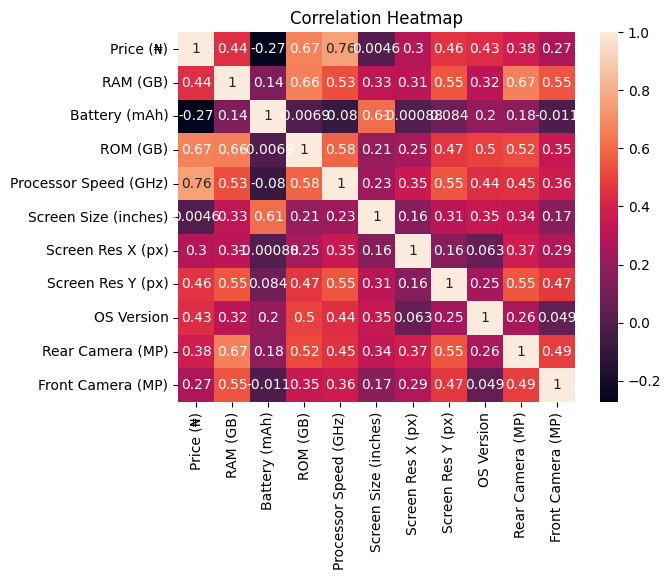

In [1099]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title('Correlation Heatmap')
plt.show()

Get number of android and iOS devices and plot on a pie chart

In [1100]:
devices = df['OS'].value_counts().reset_index()
devices

,OS,count
0,Android,666
1,iOS,29


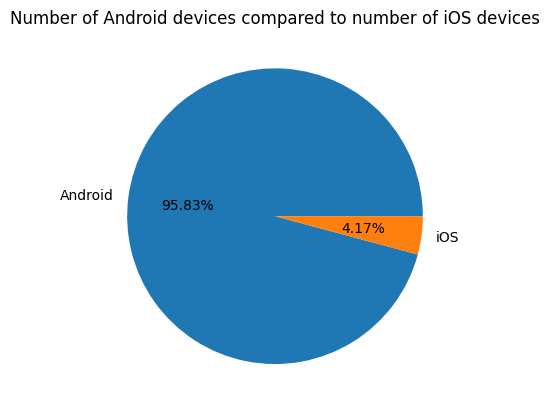

In [1101]:
plt.pie(x=devices['count'], labels=devices['OS'], autopct='%.2f%%')
plt.title('Number of Android devices compared to number of iOS devices')
plt.show()

### ML Model Building

In [1102]:
X = df.drop(columns=['Price (₦)'])
y = df['Price (₦)']

In [1103]:
X

,RAM (GB),Battery (mAh),ROM (GB),Processor Speed (GHz),Processor Core,Processor Name,Screen Size (inches),Screen Res X (px),Screen Res Y (px),OS,OS Version,Rear Camera (MP),Front Camera (MP),Sim Type
0,8,5000,128,2.80,Octa Core,Dimensity,6.67,1080,2400,Android,14,52.0,16.0,Dual Sim
2,8,5000,256,3.10,Octa Core,Dimensity,6.78,1260,2800,Android,14,150.0,50.0,Dual Sim
3,8,5000,128,2.63,Octa Core,Snapdragon,6.78,1260,2800,Android,14,100.0,50.0,Dual Sim
4,8,5000,128,2.60,Octa Core,Dimensity,6.67,1080,2400,Android,14,60.0,16.0,Dual Sim
5,8,5000,128,2.60,Octa Core,Dimensity,6.70,1080,2412,Android,14,74.0,32.0,Dual Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,2,2600,16,1.30,Quad Core,Exynos,5.00,720,1280,Android,6,8.0,5.0,Dual Sim
984,3,2500,16,1.30,Quad Core,None,5.00,720,1280,Android,6,13.0,8.0,Dual Sim
985,3,3500,32,1.50,Octa Core,Snapdragon,5.50,1080,1920,Android,5,15.0,5.0,Dual Sim
986,2,2470,16,1.40,Quad Core,Snapdragon,5.00,720,1280,Android,5,13.0,5.0,Dual Sim


Convert categorical data into numerical values using label encoding <br/>
The columns in play here are **OS and Sim Type**

In [1104]:
os_type = pd.get_dummies(X['OS'], dtype='int')
sim_type = pd.get_dummies(X['Sim Type'], dtype='int')
processor_name = pd.get_dummies(X['Processor Name'], dtype='int')
processor_core = pd.get_dummies(X['Processor Core'], dtype='int')

In [1105]:
os_type

,Android,iOS
0,1,0
2,1,0
3,1,0
4,1,0
5,1,0
...,...,...
983,1,0
984,1,0
985,1,0
986,1,0


In [1106]:
sim_type

,Dual Sim,Single Sim
0,1,0
2,1,0
3,1,0
4,1,0
5,1,0
...,...,...
983,1,0
984,1,0
985,1,0
986,1,0


In [1107]:
processor_name

,A13,Apple,Bionic,Dimensity,Exynos,Helio,Kirin,None,Qualcomm,SC9863A,Snapdragon,Spreadtrum,Tensor,Tiger,Unisoc
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
984,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
985,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
986,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [1108]:
processor_core

,Dual Core,Hexa Core,None,Octa Core,Quad Core
0,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
...,...,...,...,...,...
983,0,0,0,0,1
984,0,0,0,0,1
985,0,0,0,1,0
986,0,0,0,0,1


In [1109]:
X = pd.concat([X, os_type, sim_type, processor_name, processor_core], axis=1)

In [1110]:
X.drop(columns=['OS', 'Sim Type', 'Processor Name', 'Processor Core'], inplace=True)
X

,RAM (GB),Battery (mAh),ROM (GB),Processor Speed (GHz),Screen Size (inches),Screen Res X (px),Screen Res Y (px),OS Version,Rear Camera (MP),Front Camera (MP),...,Snapdragon,Spreadtrum,Tensor,Tiger,Unisoc,Dual Core,Hexa Core,None,Octa Core,Quad Core
0,8,5000,128,2.80,6.67,1080,2400,14,52.0,16.0,...,0,0,0,0,0,0,0,0,1,0
2,8,5000,256,3.10,6.78,1260,2800,14,150.0,50.0,...,0,0,0,0,0,0,0,0,1,0
3,8,5000,128,2.63,6.78,1260,2800,14,100.0,50.0,...,1,0,0,0,0,0,0,0,1,0
4,8,5000,128,2.60,6.67,1080,2400,14,60.0,16.0,...,0,0,0,0,0,0,0,0,1,0
5,8,5000,128,2.60,6.70,1080,2412,14,74.0,32.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,2,2600,16,1.30,5.00,720,1280,6,8.0,5.0,...,0,0,0,0,0,0,0,0,0,1
984,3,2500,16,1.30,5.00,720,1280,6,13.0,8.0,...,0,0,0,0,0,0,0,0,0,1
985,3,3500,32,1.50,5.50,1080,1920,5,15.0,5.0,...,1,0,0,0,0,0,0,0,1,0
986,2,2470,16,1.40,5.00,720,1280,5,13.0,5.0,...,1,0,0,0,0,0,0,0,0,1


In [1111]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 695 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RAM (GB)               695 non-null    int32  
 1   Battery (mAh)          695 non-null    int32  
 2   ROM (GB)               695 non-null    int32  
 3   Processor Speed (GHz)  695 non-null    float64
 4   Screen Size (inches)   695 non-null    float64
 5   Screen Res X (px)      695 non-null    int32  
 6   Screen Res Y (px)      695 non-null    int32  
 7   OS Version             695 non-null    int32  
 8   Rear Camera (MP)       695 non-null    float64
 9   Front Camera (MP)      695 non-null    float64
 10  Android                695 non-null    int32  
 11  iOS                    695 non-null    int32  
 12  Dual Sim               695 non-null    int32  
 13  Single Sim             695 non-null    int32  
 14  A13                    695 non-null    int32  
 15  Apple      

##### Model Training

In [1112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Using linear regression

In [1113]:
lreg_model = LinearRegression()
lreg_model.fit(X_train, y_train)

LinearRegression()

In [1114]:
lreg_pred = lreg_model.predict(X_test)

In [1115]:
y_test = np.array(y_test)

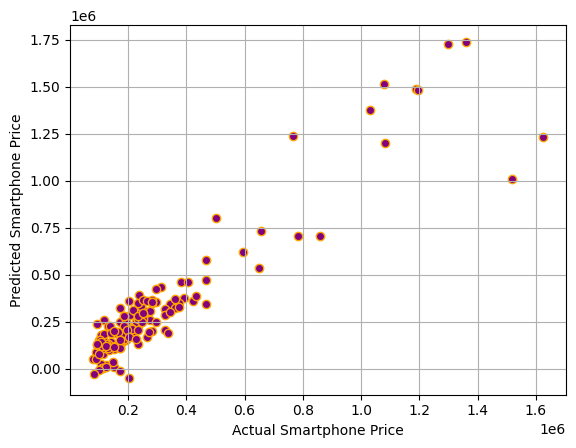

In [1116]:
plt.scatter(y_test, lreg_pred, edgecolors='orange', color='purple')
plt.xlabel('Actual Smartphone Price')
plt.ylabel('Predicted Smartphone Price')
plt.grid()
plt.show()

Accuracy score check

In [1117]:
rmse = metrics.mean_squared_error(y_test, lreg_pred)
r2 = metrics.r2_score(y_test, lreg_pred)

N = X_test.shape[0]
P = X_test.shape[1]
r2_adjusted = 1 - ((1 - r2 ) * (N - 1)) / (N - P - 1)

print(f'RMSE: {rmse:.3f}')
print(f'R2 Score: {r2:.3f}')
print(f'Adjusted R2 Score: {r2_adjusted:.3f}')

RMSE: 16476690974.517
R2 Score: 0.808
Adjusted R2 Score: 0.745


Using ridge model

In [1118]:
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.5)

In [1119]:
ridge_pred = ridge_model.predict(X_test)

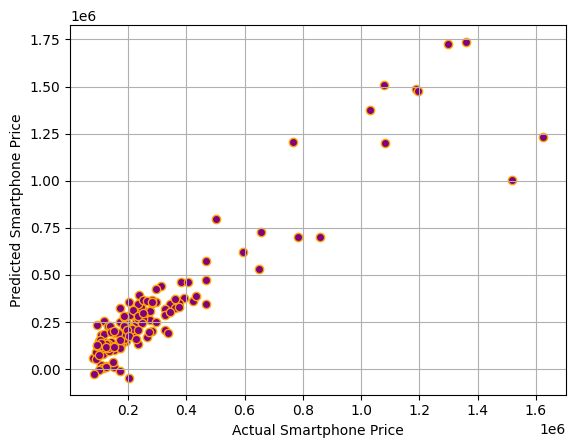

In [1120]:
plt.scatter(y_test, ridge_pred, edgecolors='orange', color='purple')
plt.xlabel('Actual Smartphone Price')
plt.ylabel('Predicted Smartphone Price')
plt.grid()
plt.show()

In [1121]:
rmse = metrics.mean_squared_error(y_test, lreg_pred)
r2 = metrics.r2_score(y_test, lreg_pred)

N = X_test.shape[0]
P = X_test.shape[1]
r2_adjusted = 1 - ((1 - r2 ) * (N - 1)) / (N - P - 1)

print(f'RMSE: {rmse:.3f}')
print(f'R2 Score: {r2:.3f}')
print(f'Adjusted R2 Score: {r2_adjusted:.3f}')

RMSE: 16476690974.517
R2 Score: 0.808
Adjusted R2 Score: 0.745


### Save model

In [1122]:
import pickle

with open('smartphone.pickle', 'wb') as file:
    pickle.dump(lreg_model, file)